In [4]:
import cv2 as cv 
import numpy as np
from matplotlib import pyplot as plt

img17 = cv.imread("./Images/img17.png")
img17_gray = cv.cvtColor(img17,cv.COLOR_BGR2GRAY)
ret,thresh = cv.threshold(img17_gray, 127, 255,0)
contours,hierarchy = cv.findContours(thresh,cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
print(len(contours))

1


In [5]:
cnt = contours[0]
hull = cv.convexHull(cnt, returnPoints = False)
defects = cv.convexityDefects(cnt, hull)
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv.line(img17,start,end,[0,255,0],2)
    cv.circle(img17,far,5,[0,0,255],-1)
cv.imshow('img',img17)
cv.waitKey(0)
cv.destroyAllWindows()

In [7]:
#点多边形匹配
dist = cv.pointPolygonTest(cnt,(50,50),False)
print(dist)

-1.0


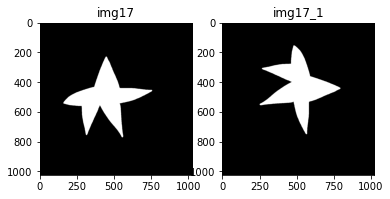

2.3592239273284576e-14


In [18]:
#形状匹配：结果越低匹配越好
#img17_1由img_17旋转而来
img17 = cv.imread('./Images/img17.png',0)
img17_1 = cv.imread('./Images/img17_1.png',0)
#img17_gray = cv.cvtColor(img17,cv.COLOR_BGR2GRAY)
#img17_1_gray = cv.cvtColor(img17_1,cv.COLOR_BGR2GRAY)

ret, thresh1 = cv.threshold(img17, 127, 255,0)
ret, thresh2 = cv.threshold(img17_1, 127, 255,0)
plt.subplot(1,2,1),plt.imshow(img17,'gray'),plt.title("img17")
plt.subplot(1,2,2),plt.imshow(img17_1,'gray'),plt.title("img17_1")
plt.show()
contours,hierarchy = cv.findContours(thresh1,2,1)
cnt1 = contours[0]
contours,hierarchy = cv.findContours(thresh2,2,1)
cnt2 = contours[0]
ret = cv.matchShapes(cnt1,cnt2,1,0.0)
print( ret )